# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto colombia
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | iaciara
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | cabinda
Processing Record 7 of Set 1 | weno
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | porto novo
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | panaba
Processing Record 12 of Set 1 | hotan
Processing Record 13 of Set 1 | devarkonda
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | indiana
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | akhmim
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | tamalous
Processing

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto colombia,10.9878,-74.9547,82.49,77,6,26.55,CO,1707704902
1,stanley,54.8680,-1.6985,37.27,90,20,4.61,GB,1707704512
2,iaciara,-14.0958,-46.6317,66.92,97,100,2.93,BR,1707704902
3,thompson,55.7435,-97.8558,12.36,85,100,0.00,CA,1707704217
4,cabinda,-5.5500,12.2000,77.14,88,100,6.91,AO,1707704902


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto colombia,10.9878,-74.9547,82.49,77,6,26.55,CO,1707704902
1,stanley,54.8680,-1.6985,37.27,90,20,4.61,GB,1707704512
2,iaciara,-14.0958,-46.6317,66.92,97,100,2.93,BR,1707704902
3,thompson,55.7435,-97.8558,12.36,85,100,0.00,CA,1707704217
4,cabinda,-5.5500,12.2000,77.14,88,100,6.91,AO,1707704902


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

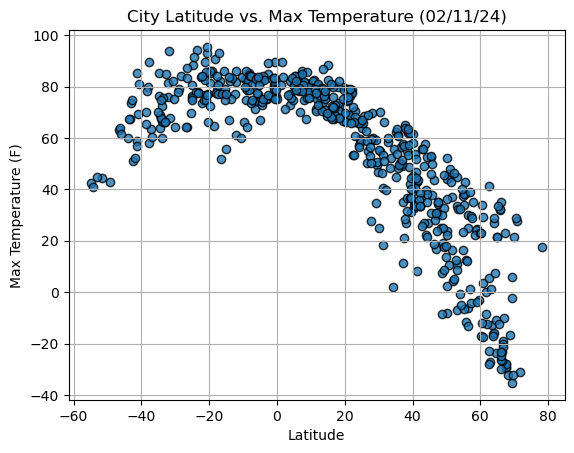

In [12]:
plt.scatter(city_data_df["Lat"],  # X-axis: latitudes
            city_data_df["Max Temp"],  # Y-axis: maximum temperatures
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  # Adding dynamic date to the title
plt.ylabel("Max Temperature (F)")  # Y-axis label
plt.xlabel("Latitude")  # X-axis label
plt.grid(True)  # Adding a grid for readability

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

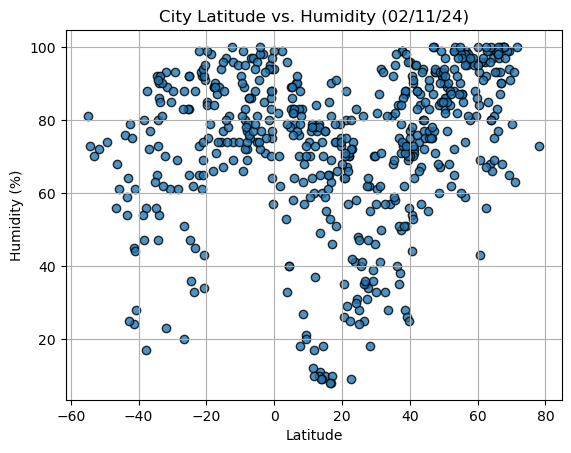

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],  # X-axis: latitudes
            city_data_df["Humidity"],  # Y-axis: humidity
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Adding dynamic date to the title
plt.ylabel("Humidity (%)")  # Y-axis label
plt.xlabel("Latitude")  # X-axis label
plt.grid(True)  # Adding a grid for readability
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

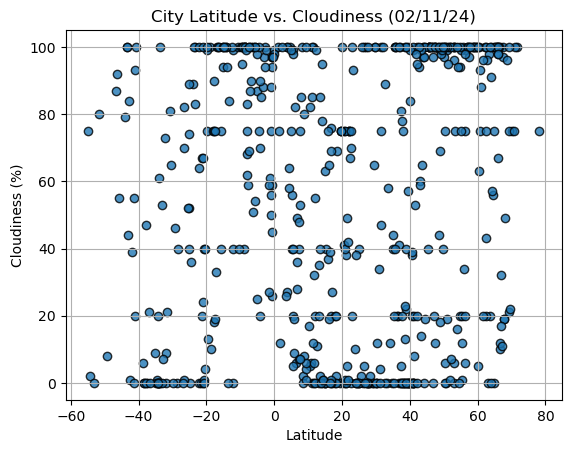

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],  # X-axis: latitudes
            city_data_df["Cloudiness"],  # Y-axis: cloudiness percentage
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Dynamic date in the title
plt.ylabel("Cloudiness (%)")  # Y-axis label
plt.xlabel("Latitude")  # X-axis label
plt.grid(True)  # Enable grid

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

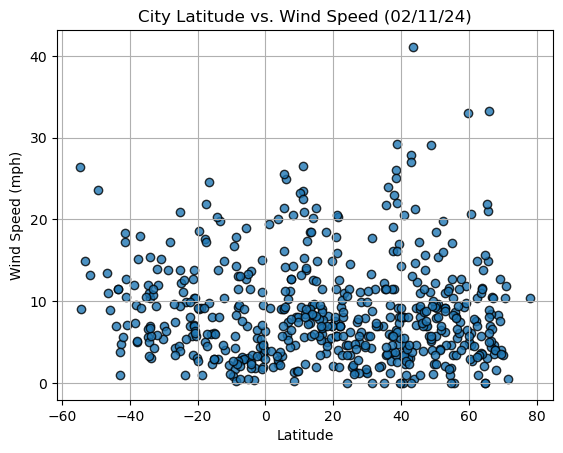

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],  # X-axis: latitudes
            city_data_df["Wind Speed"],  # Y-axis: wind speed (mph or km/h depending on your data)
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Dynamic date in the title
plt.ylabel("Wind Speed (mph)")  # Adjust unit (mph or km/h) based on your dataset
plt.xlabel("Latitude")  # X-axis label
plt.grid(True)  # Enable grid

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    """
    Perform linear regression on two sets of variables and plot the results.
    
    Parameters:
    - x_values: The x-values for the regression
    - y_values: The y-values for the regression
    - title: The title for the plot
    - text_coordinates: A tuple (x, y) indicating where to place the regression equation text on the plot
    """
    
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    
    # Calculate the regression values (y-values) based on the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_values.name)  # Assumes y_values is a pandas Series; adjust as necessary for other data types
    plt.show()
    
    # Print out the r-value along with the line equation
    print(f"The r-value is: {rvalue}")
    print(line_eq)

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto colombia,10.9878,-74.9547,82.49,77,6,26.55,CO,1707704902
1,stanley,54.8680,-1.6985,37.27,90,20,4.61,GB,1707704512
3,thompson,55.7435,-97.8558,12.36,85,100,0.00,CA,1707704217
5,weno,7.4515,151.8468,85.95,70,40,12.66,FM,1707704902
7,porto novo,6.4965,2.6036,84.02,90,6,5.86,BJ,1707704529


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iaciara,-14.0958,-46.6317,66.92,97,100,2.93,BR,1707704902
4,cabinda,-5.5500,12.2000,77.14,88,100,6.91,AO,1707704902
6,west island,-12.1568,96.8225,85.98,74,40,10.36,CC,1707704500
8,papatowai,-46.5619,169.4708,63.16,56,87,13.40,NZ,1707704495
18,bredasdorp,-34.5322,20.0403,63.75,92,1,5.66,ZA,1707704500


###  Temperature vs. Latitude Linear Regression Plot

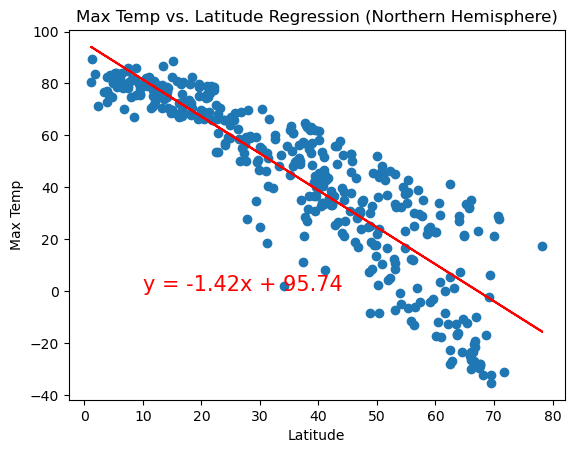

The r-value is: -0.8822688409522685
y = -1.42x + 95.74


In [19]:

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp vs. Latitude Regression (Northern Hemisphere)', (10, 0))


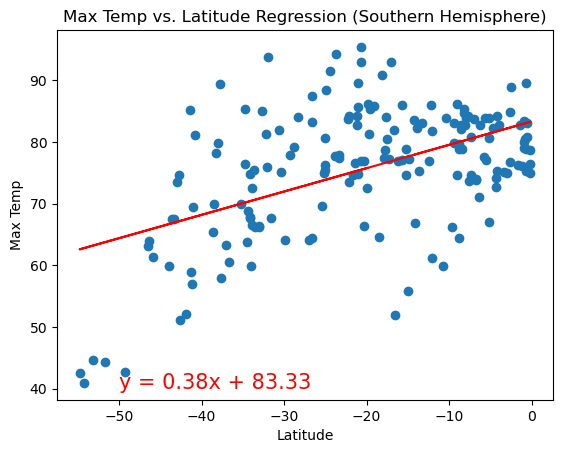

The r-value is: 0.5124807879898234
y = 0.38x + 83.33


In [20]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp vs. Latitude Regression (Southern Hemisphere)', (-50, 40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
<p>In the Northern Hemisphere, there's a clear pattern that shows as you move further from the equator towards the North Pole, it gets colder. This happens because the further you go, the sun's rays hit the earth at a more slanted angle, delivering less heat.</p>


<p> In the Southern Hemisphere, there's also a relationship between where you are in terms of latitude and the weather, but it's not as strong. Latitude does affect the weather, but it's just one of many things that influence it.</p>

### Humidity vs. Latitude Linear Regression Plot

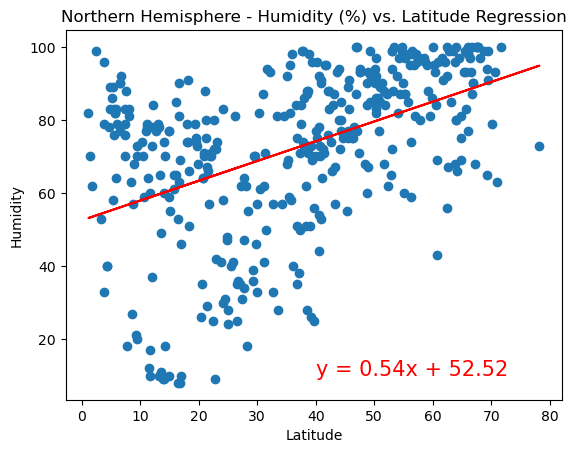

The r-value is: 0.4676297192134957
y = 0.54x + 52.52


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']  # Latitude values
y_values = northern_hemi_df['Humidity']  # Humidity values

# Call the function with the Northern Hemisphere data for humidity vs. latitude
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Humidity (%) vs. Latitude Regression', (40, 10))

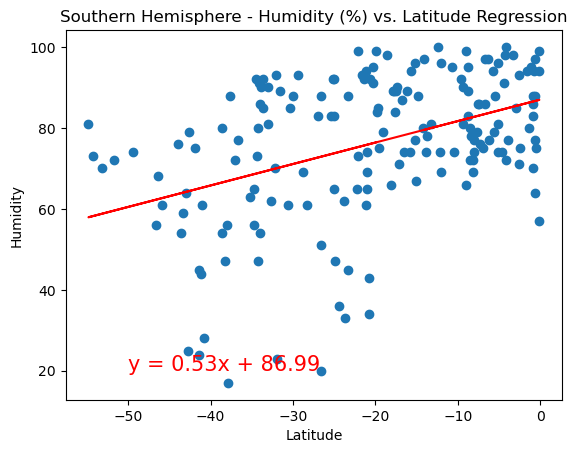

The r-value is: 0.4222874888919754
y = 0.53x + 86.99


In [22]:
x_values = southern_hemi_df['Lat']  # Latitude values
y_values = southern_hemi_df['Humidity']  # Humidity values

# Call the function with the Southern Hemisphere data for humidity vs. latitude
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Humidity (%) vs. Latitude Regression', (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

<p>The analysis shows that as you move further away from the equator, either north or south, places tend to get more humid. But, other factors are also involved in determining how humid a place will be, which are not included in this analysis. 

### Cloudiness vs. Latitude Linear Regression Plot

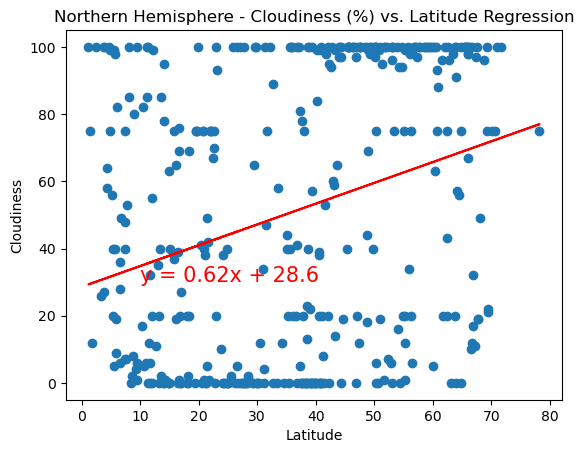

The r-value is: 0.29246015226636035
y = 0.62x + 28.6


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']  # Latitude values from Northern Hemisphere DataFrame
y_values = northern_hemi_df['Cloudiness']  # Cloudiness values from Northern Hemisphere DataFrame

# Call the function with the Northern Hemisphere data for cloudiness vs. latitude
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Cloudiness (%) vs. Latitude Regression', (10, 30))

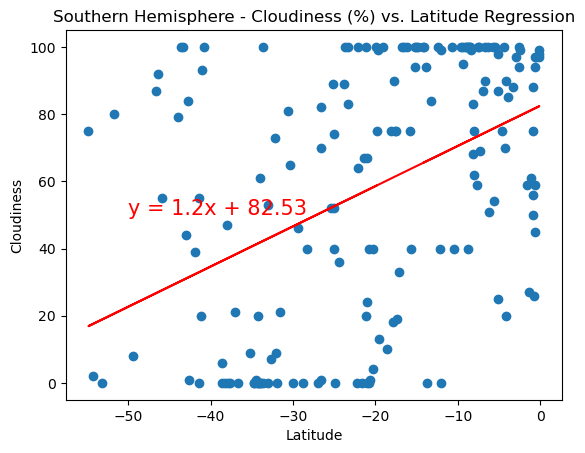

The r-value is: 0.44265583045680745
y = 1.2x + 82.53


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']  # Latitude values from Southern Hemisphere DataFrame
y_values = southern_hemi_df['Cloudiness']  # Cloudiness values from Southern Hemisphere DataFrame

# Call the function with the Southern Hemisphere data for cloudiness vs. latitude
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Cloudiness (%) vs. Latitude Regression', (-50, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

<p> The analysis found that places further from the equator might have more clouds, but this relationship isn't strong enough to say for sure that just because a place is further north or south, it will be cloudier. It highlights that cloud patterns are complex, and many other factors need to be considered when looking at weather and climate changes..</P>

### Wind Speed vs. Latitude Linear Regression Plot

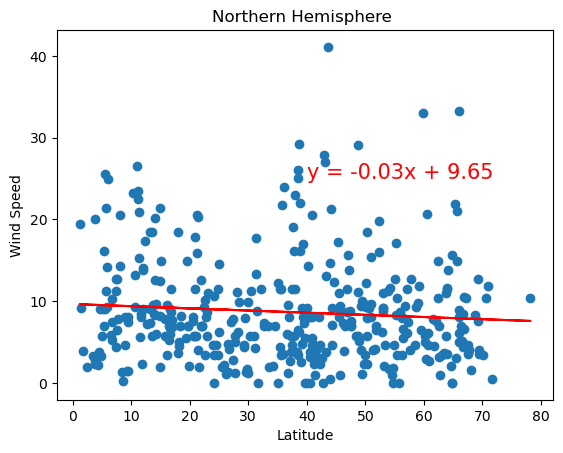

The r-value is: -0.08045519476275152
y = -0.03x + 9.65


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']  # Latitude values from Northern Hemisphere DataFrame
y_values = northern_hemi_df['Wind Speed']  # Wind Speed values from Northern Hemisphere DataFrame

# Call the function with the Northern Hemisphere data for wind speed vs. latitude
plot_linear_regression(x_values, y_values, 'Northern Hemisphere ', (40, 25))

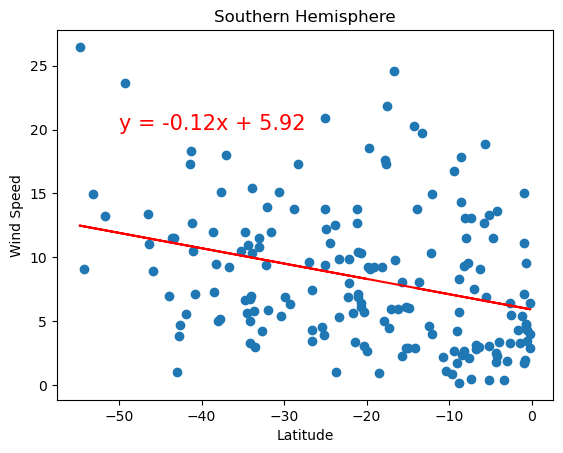

The r-value is: -0.31243914131016876
y = -0.12x + 5.92


In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']  # Latitude values from Southern Hemisphere DataFrame
y_values = southern_hemi_df['Wind Speed']  # Wind Speed values from Southern Hemisphere DataFrame

# Call the function with the Southern Hemisphere data for wind speed vs. latitude
plot_linear_regression(x_values, y_values, 'Southern Hemisphere', (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE


 <p>The analysis shows that as you move further from the equator, in both the Northern and Southern Hemispheres, there might be a tiny decrease in wind speed, but the relationship can't present if latitude is the main factor in determining how windy a place will be. The variation between the two hemispheres indicates the complexities of the atmosphere , and how  many factors must be involve to affect wind speed.</p>